## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#read the data file
df = pd.read_csv('ab_data.csv')

#show the first 5 rows of the dataset
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
#get the number of rows in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#retrieve the number of unique users in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
#proportion of users who converted
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#query how many times the treatment group did not land on the new page
mismatch_1=(df.query('group == "treatment" and landing_page != "new_page"')).count()[0]

#query how many times the control group did not land on the old page
mismatch_2=(df.query('group == "control" and landing_page != "old_page"')).count()[0]

#total number of mismatches
mismatches=mismatch_1 + mismatch_2
mismatches

3893

f. Do any of the rows have missing values?

In [7]:
#check for missing values
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#We need to drop the rows where treatment is not aligned with new page or controlnot aligned with old page
#so we can create two dataframes with correct alignments and join them together
#create a new df where treatment is aligned with new page
treatment_df = df.query('group == "treatment" and landing_page == "new_page"')
#view the first few rows of the dataset
treatment_df.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [9]:
#create another df to store the rows where control is aligned with old page
control_df = df.query('group == "control" and landing_page == "old_page"')
#view the first few rows of the dataset
control_df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [10]:
#merge the two datasets together and store it as df2
df2=pd.concat([treatment_df, control_df], axis=0, join="outer")

#obtain details about the new dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
#obtain the number of unique users in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
#check for duplicates
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
#drop duplicate user in place
df2.drop_duplicates(inplace = True, keep=False)

In [16]:
#check the number of unique users
df2.nunique()[0]

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
#get the proportion of individuals who converted regardless of the page
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
#probability of conversion given the individual was in the control group
(df2.query('group == "control"')).converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
#probability of conversion given the individual was in the treatment group
(df2.query('group == "treatment"')).converted.mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [20]:
#probability that the individual received the new page
df2.query('landing_page == "new_page"').count()[0] / df2.shape[0]

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the above results, there is no sufficient evidence to say that the new treatment page leads to more conversions. The probability to convert in the treatment group is almost the same as that in the control group (~12%).

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_{o} : p_{new} - p_{old} ≤ 0 $$**

**$$H_{A} : p_{new} - p_{old} > 0 $$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
#success rate of new page
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
#success rate of old page
p_old=df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$?

In [23]:
#number of users who landed on the new page
n_new=df2.query('landing_page == "new_page"').count()[0]
n_new

145311

d. What is $n_{old}$?

In [24]:
#number of users who landed on the old page
n_old=df2.query('landing_page == "old_page"').count()[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
#simulation of p_new transactions under the null
new_page_converted = np.random.choice([0, 1], size=n_new, p=[(1 - p_new), p_new]).mean()
new_page_converted

0.11844251295497243

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
#simulation of p_old under the null
old_page_converted = np.random.choice([0, 1], size=n_old, p=[(1 - p_old), p_old]).mean()
old_page_converted

0.11991133995071382

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
new_page_converted - old_page_converted

-0.0014688269957413846

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [28]:
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

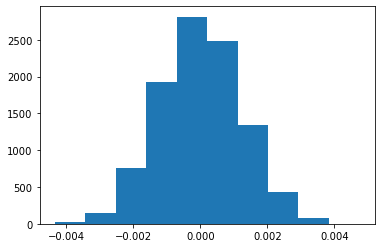

In [29]:
#plot the histogram of the obtained p_diffs
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
diff = (df2.query('group == "treatment"')).converted.mean() - (df2.query('group == "control"')).converted.mean()
(p_diffs>diff).mean()

0.9043

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The computed value is called the "p-value". Since the p-value is not less than the specified alpha level (5% error), this means that the difference most probably came from our population. Therefore there is no sufficient evidence to reject the null hypothesis so, it should be retained.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
#import statsmodels library to compute p-value
import statsmodels.api as sm

convert_old =  sum(df2.query("group == 'control'")['converted'])
convert_new =  sum(df2.query("group == 'treatment'")['converted'])
n_old = df2.query('landing_page == "old_page"').count()[0]
n_new = df2.query('landing_page == "new_page"').count()[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
from statsmodels.stats.proportion import proportions_ztest

#counts is the total number of successes while nobs is the total number of observations
count = np.array([convert_old, convert_new])
nobs= np.array([n_old, n_new])
proportions_ztest(count=count, nobs=nobs, alternative = 'smaller')

(1.3116075339133115, 0.905173705140591)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The obtained results mean that the probability of obtaining a statistic = 1.31 is ~91%. The results agree with the findings in parts j and k in terms of probability and that they lead to retaining the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We should use **Logistic Regression** in this case

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [33]:
#create dummy variables for the categorical column "group"
df2[['control', 'ab_page']]=pd.get_dummies(df['group'])

df2['intercept']=1
#drop the control group column as it is unnecessary
df2 = df2.drop('control', axis =1)

In [34]:
#check that the correct columns were added in the dataset
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [35]:
#fit the model
Logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]) 
results = Logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [36]:
#display the results summary of the model
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.6032
Date:               2022-08-20 20:35 BIC:              212801.7625
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290583           LLR p-value:      0.18965    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value associated with **ab_page** is equal to 0.19 (as opposed to the '0.9' value obtained in part 2). Here the p-value is given for testing if the parameter is equal to zero and hence the null hypothesis or not. It determines whether or not the ab_page is useful for predicting the response while in part 2, we were comparing the difference in the conversion rates between two groups. We want to see the probability that a statistic came from the null.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding more variables to our model can enhance its predictability however we should be aware that multicollinearity may exist between variables. We may also have correlated errors and we may not have constant variance of errors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [37]:
#read in the new dataset
countries_df = pd.read_csv('./countries.csv')

#create a new dataset composed of the original dataset + the "country" column
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [38]:
#view the new dataset and check it's correctly created
df_new

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1
...,...,...,...,...,...,...,...
945994,UK,2017-01-03 14:41:21.565258,control,old_page,0,0,1
945996,US,2017-01-09 18:58:19.952277,treatment,new_page,0,1,1
945997,US,2017-01-04 06:56:24.658147,control,old_page,0,0,1


In [39]:
### Create the necessary dummy variables
df_new[['US', 'UK', 'CA']]=pd.get_dummies(df_new['country'])
df_new['CA_ab']=df_new['CA']*df_new['ab_page']
df_new['UK_ab']=df_new['UK']*df_new['ab_page']
#drop unnecessary column
df_new = df_new.drop('US', axis =1)
df_new

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,CA,CA_ab,UK_ab
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1,1,0
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1,1,0
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,0,1,0,1,0,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1,1,0
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
945994,UK,2017-01-03 14:41:21.565258,control,old_page,0,0,1,1,0,0,0
945996,US,2017-01-09 18:58:19.952277,treatment,new_page,0,1,1,0,1,1,0
945997,US,2017-01-04 06:56:24.658147,control,old_page,0,0,1,0,1,0,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [40]:
### Fit Your Linear Model And Obtain the Results
Logit_mod_2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'CA', 'CA_ab','UK_ab']]) 
results_2 = Logit_mod_2.fit()

results_2.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.9124
Date:               2022-08-20 20:35 BIC:              212846.3903
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.19182    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
CA_ab          0.0469    0.0538    0.8716  0.3834  -0.0585   0.1523
UK_ab          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

At a set alpha level of 5%, none of the added variables seems to be significant in predicting the outcome, they all have a p-value > 5%. Adding the country as a variable did not improve the predictability of the model.

<a id='conclusions'></a>
## Conclusions

Considering the results of the a/b testing and the logistic regression model, the old page is being converted to more. The obtained p-value (~0.9) suggests that there is no sufficient evidence to reject the null hypothesis, which is that there is no difference between the new and old pages. Also, the regression model suggests the same.

